<a href="https://colab.research.google.com/github/Eagz7/ML_Proyect/blob/main/ML_ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INTEGRANTES
*   Sonali Silva Barreda
*   Erick Alexander Garcia Zavaleta


## **1: Proceso de limpieza**

In [ ]:
#importamos las librerias
import numpy as np
import pandas as pd 
from pandas.core.sorting import decons_obs_group_ids
import matplotlib.pyplot as plt
from sklearn_pandas import CategoricalImputer
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #NORMALIZATION


In [ ]:
data = pd.read_csv("TB_HOSP_VAC_FALLECIDOS.csv" )
data.head()
#obteniendo el nombre de cada columna
columns_names = data.columns.values
columns_names_list = list(columns_names)
print("-------------------------------------")
print("% DE NULOS POR COLUMNA")
print("-------------------------------------")
total=len(columns_names_list)-1
print(total)
i=0
data2=data

#determinar % de valores nulos en la columna
def porc_fal(columna):
  num=columna.isnull().sum()
  len_data=len(data)
  return(num/len_data)*100

columnasvacias=[]
i=0
j=0
numcolums=list
for i in range(0,total): #imprimir el nombre de la columna
  print(data.columns.values[i], "             ",porc_fal(data[data.columns.values[i]])) #imprimir porcentaje de nulos
  if porc_fal(data[data.columns.values[i]]) >= 80: #guardar la posicion de columnas que tengan más del 80% de valores nulos
    columnasvacias.append(i)
    print(data.columns.values[i], "posicion -------->",i, " !!!!!!! MAYOR A 80 !!!!!!!! ")


-------------------------------------
% DE NULOS POR COLUMNA
-------------------------------------
31
eess_renaes               0.0
eess_diresa               0.0
eess_red               0.0
eess_nombre               0.0
id_eess               0.0
id_persona               0.0
edad               6.349504406024921
sexo               5.580294271496975
fecha_ingreso_hosp               0.0
flag_uci               0.0
fecha_ingreso_uci               90.63267030594042
fecha_ingreso_uci posicion --------> 10  !!!!!!! MAYOR A 80 !!!!!!!! 
fecha_ingreso_ucin               94.77715036817469
fecha_ingreso_ucin posicion --------> 11  !!!!!!! MAYOR A 80 !!!!!!!! 
con_oxigeno               0.004023767050712878
con_ventilacion               0.010059417626782193
fecha_segumiento_hosp_ultimo               0.0006706278417854796
evolucion_hosp_ultimo               1.5478090588408868
flag_vacuna               0.0
fecha_dosis1               36.6156095336454
fabricante_dosis1               36.6156095336454
fecha

In [ ]:
data.dtypes

eess_renaes                       int64
eess_diresa                      object
eess_red                         object
eess_nombre                      object
id_eess                           int64
id_persona                        int64
edad                            float64
sexo                             object
fecha_ingreso_hosp               object
flag_uci                          int64
fecha_ingreso_uci                object
fecha_ingreso_ucin               object
con_oxigeno                     float64
con_ventilacion                 float64
fecha_segumiento_hosp_ultimo     object
evolucion_hosp_ultimo            object
flag_vacuna                       int64
fecha_dosis1                     object
fabricante_dosis1                object
fecha_dosis2                     object
fabricante_dosis2                object
fecha_dosis3                     object
fabricante_dosis3                object
fecha_dosis4                     object
fabricante_dosis4                object


In [ ]:
data2.isnull().sum()

eess_renaes                          0
eess_diresa                          0
eess_red                             0
eess_nombre                          0
id_eess                              0
id_persona                           0
edad                              9468
sexo                              8321
fecha_ingreso_hosp                   0
flag_uci                             0
fecha_ingreso_uci               135146
fecha_ingreso_ucin              141326
con_oxigeno                          6
con_ventilacion                     15
fecha_segumiento_hosp_ultimo         1
evolucion_hosp_ultimo             2308
flag_vacuna                          0
fecha_dosis1                     54599
fabricante_dosis1                54599
fecha_dosis2                     58869
fabricante_dosis2                58869
fecha_dosis3                     73316
fabricante_dosis3                73316
fecha_dosis4                    118606
fabricante_dosis4               118606
cdc_positividad          

In [ ]:
elementos=0
posicionmovida=0
total=len(columnasvacias)
print(total)

#borrar columnas con mas del 80% de nulos
while elementos < len(columnasvacias):
    borrar= columnasvacias[elementos] - posicionmovida 
    nombre=data2.columns.values[borrar] 
    print('borrado ---------------------> ', nombre) #nombre de la columna borrada
    data2.drop(columns=nombre,axis=1,inplace=True)  #Borrando valores
    posicionmovida=1+elementos  #empezar a descontar las posiciones borradas
    elementos = elementos + 1

print(len(data2.columns))#imprimir el nuevo tamaño
print(data2.columns)

columns_names2 = data2.columns.values
columns_names_list2 = list(columns_names2)
#df.columns.values[1]
total=len(columns_names_list2)
print(total)

#object float64
numcolums=list
for i in range(0,total): #recorrer la data borrada
  columnanombre=data.columns.values[i]#nombre de la columna
  print("----------------------------")
  if data2[columnanombre].dtype == np.int64 or data2[columnanombre].dtype == np.float64:
    
    print("LA COLUMNA    ",columnanombre, " ES NUMERICA")
    media=data2[columnanombre].mean()
    mediana=data2[columnanombre].median()
    moda=pd.Series(data2[[columnanombre]].values.flatten()).mode()[0]
    
    print("MEDIA",media)
    print("MEDIANA",mediana)
    print("MODA", moda)
    uno=(mediana-media)
    dos=(mediana-moda)

    #VOLVEMOS LOS NUMEROS POSITIVOS
    if uno < 0:
      uno=uno*-1
    if dos < 0:
      dos=dos*-1

    if uno<dos or uno==0:
      print("GANÓ MEDIA") 
      #IMPUTANDO VALORES CON LOS DATOS DE LA MEDIA
      data2[columnanombre]=data2[columnanombre].fillna(round(media))
      print("----------------------------")

    elif dos<uno or dos==0:
      print("GANÓ MODA")    
      #IMPUTANDO VALORES CON DATOS DE LA MODA
      data2[columnanombre]=data2[columnanombre].fillna(round(moda)) 
      print("----------------------------")

  elif data2[columnanombre].dtype == object:
    print("----------------------------")
    print("LA COLUMNA    ",columnanombre, " ES CATEGORICA")
    if columnanombre == "sexo": #la unica nominal de nuestra BD
      replacenom = {"sexo":     {"F": 0, "M": 1}}
      data2 = data2.replace(replacenom)
      media=data2[columnanombre].mean()
      data2[columnanombre]=data2[columnanombre].fillna(round(media))

    else:
      data2[columnanombre]=data2[columnanombre].fillna("No") #ordinales con NO
      data2[columnanombre] = data2[columnanombre].astype('category')
      print(data2[columnanombre].value_counts())#Para saber cuántas categorías existen, usamos count_values
      data2[columnanombre] = data2[columnanombre].cat.codes #Con el comando "cat.codes" convertimos los nombres a valores
      print(data2[columnanombre].value_counts())
    print("----------------------------")

2
borrado --------------------->  fecha_ingreso_uci
borrado --------------------->  fecha_ingreso_ucin
30
Index(['eess_renaes', 'eess_diresa', 'eess_red', 'eess_nombre', 'id_eess',
       'id_persona', 'edad', 'sexo', 'fecha_ingreso_hosp', 'flag_uci',
       'con_oxigeno', 'con_ventilacion', 'fecha_segumiento_hosp_ultimo',
       'evolucion_hosp_ultimo', 'flag_vacuna', 'fecha_dosis1',
       'fabricante_dosis1', 'fecha_dosis2', 'fabricante_dosis2',
       'fecha_dosis3', 'fabricante_dosis3', 'fecha_dosis4',
       'fabricante_dosis4', 'cdc_positividad', 'cdc_fecha_fallecido_covid',
       'cdc_fallecido_covid', 'ubigeo_inei_domicilio', 'dep_domicilio',
       'prov_domicilio', 'dist_domicilio'],
      dtype='object')
30
----------------------------
LA COLUMNA     eess_renaes  ES NUMERICA
MEDIA 7403.9772992475555
MEDIANA 5883.0
MODA 23159
GANÓ MEDIA
----------------------------
----------------------------
----------------------------
LA COLUMNA     eess_diresa  ES CATEGORICA
LIMA DIRIS

In [ ]:
data2.isnull().sum()

eess_renaes                     0
eess_diresa                     0
eess_red                        0
eess_nombre                     0
id_eess                         0
id_persona                      0
edad                            0
sexo                            0
fecha_ingreso_hosp              0
flag_uci                        0
con_oxigeno                     0
con_ventilacion                 0
fecha_segumiento_hosp_ultimo    0
evolucion_hosp_ultimo           0
flag_vacuna                     0
fecha_dosis1                    0
fabricante_dosis1               0
fecha_dosis2                    0
fabricante_dosis2               0
fecha_dosis3                    0
fabricante_dosis3               0
fecha_dosis4                    0
fabricante_dosis4               0
cdc_positividad                 0
cdc_fecha_fallecido_covid       0
cdc_fallecido_covid             0
ubigeo_inei_domicilio           0
dep_domicilio                   0
prov_domicilio                  0
dist_domicilio

In [ ]:
data2.head()

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fabricante_dosis3,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
0,4210,5,30,14,4207,18058852,3.0,0.0,20,0,...,2,263,2,1,938,0,60801,5,99,632
1,23159,17,30,39,21646,18063364,27.0,0.0,988,0,...,3,263,2,0,938,0,150124,14,112,1079
2,23159,17,30,39,21646,18063364,27.0,0.0,988,0,...,3,263,2,0,938,0,150124,14,112,1079
3,4210,5,30,14,4207,15799022,72.0,0.0,584,0,...,2,263,2,0,938,0,60801,5,99,632
4,10041,7,30,0,9743,15385783,66.0,0.0,477,0,...,3,263,2,0,938,0,80101,7,64,431


In [ ]:
len(data)

149114

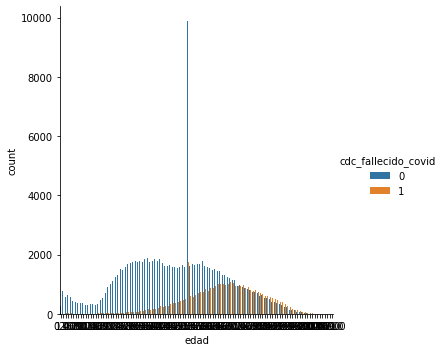

In [ ]:
sns.catplot(x ="edad", hue ="cdc_fallecido_covid", #fallecido 1, no fallecido 0
kind ="count", data = data2) 

In [ ]:
#Undersampling
# class count
class_count_0, class_count_1 = data2['cdc_fallecido_covid'].value_counts()

# Separate class
class_0 = data2[data2['cdc_fallecido_covid']== 0]
class_1 = data2[data2['cdc_fallecido_covid'] == 1] # imprimir la forma de la clase

Total de registros: 0    38407
1    38407
Name: cdc_fallecido_covid, dtype: int64


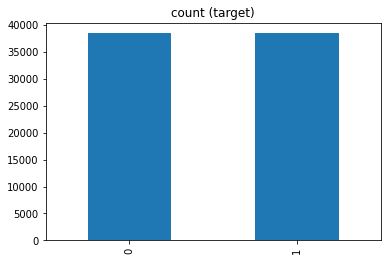

In [ ]:
class_0_under = class_0.sample(class_count_1)
test_under = pd.concat([class_0_under, class_1], axis=0)
print("Total de registros:",test_under['cdc_fallecido_covid'].value_counts())#graficar el conteo después del submuestreo
test_under['cdc_fallecido_covid'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
#ValoresAtipicos
#Nos ayudamos de la libreria ArbitraryOutlierCapper
!pip install feature-engine
from feature_engine.outliers import ArbitraryOutlierCapper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data2.edad.max()

111.0

In [ ]:
data2.edad.min()

0.0

In [ ]:
capper = ArbitraryOutlierCapper(max_capping_dict={
    'edad': 90},
    min_capping_dict={
    'edad': 18})

capper.fit(data2.fillna(0))

ArbitraryOutlierCapper(max_capping_dict={'edad': 90},
                       min_capping_dict={'edad': 18})

In [ ]:
capper.right_tail_caps_

{'edad': 90}

In [ ]:
capper.left_tail_caps_

{'edad': 18}

In [ ]:
temp = capper.transform(data2.fillna(0))
temp.edad.min()

18.0

In [ ]:
temp.edad.max()

90.0

##**2: Transformación y seleccion**



In [ ]:
#obj_df.describe(include="all")
#obj_df.columns
#DUMMIES
from sklearn.preprocessing import OneHotEncoder
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(data2[["cdc_fallecido_covid"]])
#pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()

pd.get_dummies(data2, columns=["cdc_fallecido_covid"], prefix=["fallecido"]).head()

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio,fallecido_0,fallecido_1
0,4210,5,30,14,4207,18058852,3.0,0.0,20,0,...,263,2,1,938,60801,5,99,632,1,0
1,23159,17,30,39,21646,18063364,27.0,0.0,988,0,...,263,2,0,938,150124,14,112,1079,1,0
2,23159,17,30,39,21646,18063364,27.0,0.0,988,0,...,263,2,0,938,150124,14,112,1079,1,0
3,4210,5,30,14,4207,15799022,72.0,0.0,584,0,...,263,2,0,938,60801,5,99,632,1,0
4,10041,7,30,0,9743,15385783,66.0,0.0,477,0,...,263,2,0,938,80101,7,64,431,1,0


In [ ]:
#Aplicando Regresion Lineal

from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder

feature_cols = [
    'edad', 'sexo', 'evolucion_hosp_ultimo', 'prov_domicilio', 'cdc_fallecido_covid',
    'flag_vacuna', 'flag_uci','eess_diresa'
]

# Eliminar las filas de edad vacías
df_ml = data2.dropna(subset=['edad'])

X = df_ml[feature_cols]
y = df_ml['edad']

#

In [ ]:
enc = make_column_transformer( (OneHotEncoder(handle_unknown='ignore'),
                                        ['evolucion_hosp_ultimo','flag_uci','eess_diresa']),
                                      (OrdinalEncoder(), ['flag_vacuna']),
                                      remainder='passthrough')

In [ ]:
X_transform = enc.fit_transform(X)
model = LinearRegression()
model.fit(X_transform, y)

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.33, random_state=42)

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

2918489.4904321707


In [ ]:
#Usando solo Ordinal encoder
enc = make_column_transformer((OrdinalEncoder(),
                                        ['sexo', 'evolucion_hosp_ultimo', "prov_domicilio"]),
                                      (OrdinalEncoder(), ['flag_vacuna']),
                                      remainder='passthrough')

In [ ]:
X_transform = enc.fit_transform(X)
model = LinearRegression()
model.fit(X_transform, y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size=0.33, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.3124735094123578


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2 #CHI2
from sklearn.preprocessing import StandardScaler #NORMALIZATION
from sklearn.feature_selection import SelectKBest #ANOVA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis#LDA

In [ ]:
#importamos el dataset 
#Agregar la columna de la etiqueta
#data['Cl'] = data2.cdc_fallecido_covid
data2['CLASS'] = data2.cdc_fallecido_covid
data2.describe()

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio,CLASS
count,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,1.491140e+05,149114.000000,149114.000000,149114.000000,149114.000000,...,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000,149114.000000
mean,7403.977299,12.997700,28.293406,52.097288,7142.586498,1.957571e+07,51.136889,0.549264,501.454867,0.132442,...,235.329889,1.840283,0.525068,815.809146,0.257568,126089.989552,11.574145,102.194442,864.707284,0.257568
std,7184.030648,7.344255,6.660682,27.379562,6665.593050,1.283430e+07,20.544265,0.497569,293.057235,0.338972,...,63.678155,0.425462,0.499373,248.630667,0.437296,59096.339629,5.927218,43.305580,491.932163,0.437296
min,3.000000,0.000000,0.000000,0.000000,3.000000,1.100000e+01,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10101.000000,0.000000,0.000000,0.000000,0.000000
25%,2289.000000,7.000000,30.000000,33.000000,2288.000000,7.700870e+06,36.000000,0.000000,246.000000,0.000000,...,263.000000,2.000000,0.000000,911.000000,0.000000,80106.000000,7.000000,72.000000,433.000000,0.000000
50%,5883.000000,14.000000,30.000000,50.000000,5880.000000,1.822007e+07,51.000000,1.000000,501.000000,0.000000,...,263.000000,2.000000,1.000000,938.000000,0.000000,150104.000000,14.000000,112.000000,855.000000,0.000000
75%,7633.000000,17.000000,30.000000,73.000000,7437.000000,3.440050e+07,66.000000,1.000000,756.000000,0.000000,...,263.000000,2.000000,1.000000,938.000000,1.000000,150142.000000,14.000000,112.000000,1294.000000,1.000000
max,28025.000000,28.000000,46.000000,106.000000,26275.000000,4.048290e+07,111.000000,1.000000,1012.000000,1.000000,...,263.000000,4.000000,1.000000,938.000000,1.000000,250401.000000,24.000000,195.000000,1594.000000,1.000000


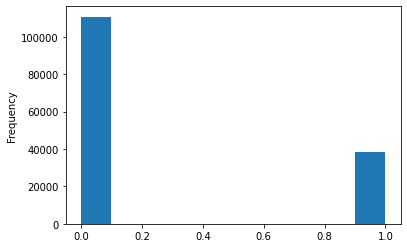

In [ ]:
data2['CLASS'].plot.hist()

In [ ]:
# Separamos los datos de entrenamiento de los de test
X_train, X_test, y_train, y_test = train_test_split(data2.drop('CLASS', axis=1),
                                                    data2['CLASS'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((104379, 30), (44735, 30))

In [ ]:
# Hallamos la media de los datos de entrenamiento
means = (X_train.mean(axis=0))
means

eess_renaes                     7.415533e+03
eess_diresa                     1.298521e+01
eess_red                        2.828474e+01
eess_nombre                     5.212128e+01
id_eess                         7.153317e+03
id_persona                      1.952880e+07
edad                            5.109902e+01
sexo                            5.489323e-01
fecha_ingreso_hosp              5.007408e+02
flag_uci                        1.323734e-01
con_oxigeno                     6.660918e-01
con_ventilacion                 9.020972e-02
fecha_segumiento_hosp_ultimo    4.973964e+02
evolucion_hosp_ultimo           1.648358e+00
flag_vacuna                     1.948390e+00
fecha_dosis1                    4.597983e+02
fabricante_dosis1               2.725864e+00
fecha_dosis2                    4.543788e+02
fabricante_dosis2               2.702095e+00
fecha_dosis3                    3.254516e+02
fabricante_dosis3               2.256239e+00
fecha_dosis4                    2.353148e+02
fabricante

In [ ]:
#identificamos el valor min y max de los datos de entrenmiento
ranges = X_train.max(axis=0)-X_train.min(axis=0)
ranges

eess_renaes                        28022.0
eess_diresa                           28.0
eess_red                              46.0
eess_nombre                          106.0
id_eess                            26272.0
id_persona                      40482804.0
edad                                 111.0
sexo                                   1.0
fecha_ingreso_hosp                  1012.0
flag_uci                               1.0
con_oxigeno                            1.0
con_ventilacion                        1.0
fecha_segumiento_hosp_ultimo        1005.0
evolucion_hosp_ultimo                  7.0
flag_vacuna                            4.0
fecha_dosis1                         673.0
fabricante_dosis1                      4.0
fecha_dosis2                         649.0
fabricante_dosis2                      4.0
fecha_dosis3                         433.0
fabricante_dosis3                      4.0
fecha_dosis4                         263.0
fabricante_dosis4                      4.0
cdc_positiv

In [ ]:
# Ahora normalizamos:
X_train_scaled = (X_train - means) / ranges
X_test_scaled = (X_test - means) / ranges

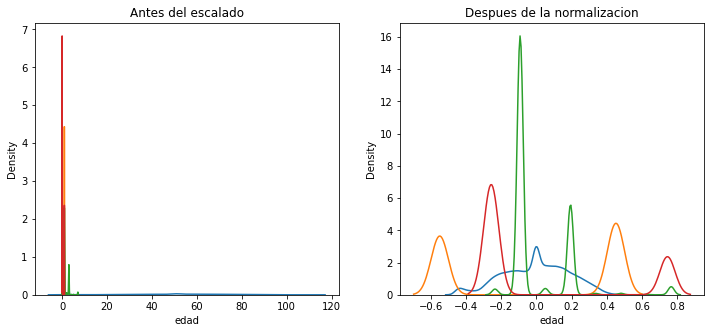

In [ ]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Antes
ax1.set_title('Antes del escalado')
sns.kdeplot(X_train['edad'], ax=ax1)
sns.kdeplot(X_train['sexo'], ax=ax1)
sns.kdeplot(X_train['evolucion_hosp_ultimo'], ax=ax1)
sns.kdeplot(X_train['cdc_fallecido_covid'], ax=ax1)

# Despues
ax2.set_title('Despues de la normalizacion')
sns.kdeplot(X_train_scaled['edad'], ax=ax2)
sns.kdeplot(X_train_scaled['sexo'], ax=ax2)
sns.kdeplot(X_train_scaled['evolucion_hosp_ultimo'], ax=ax2)
sns.kdeplot(X_train_scaled['cdc_fallecido_covid'], ax=ax2)
plt.show()

In [ ]:
np.round(X_train_scaled.describe(include="all"), 1)

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fabricante_dosis3,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
count,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,...,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0,104379.0
mean,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,...,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
std,0.3,0.3,0.1,0.3,0.3,0.3,0.2,0.5,0.3,0.3,...,0.2,0.2,0.1,0.5,0.3,0.4,0.2,0.2,0.2,0.3
min,-0.3,-0.5,-0.6,-0.5,-0.3,-0.5,-0.5,-0.5,-0.5,-0.1,...,-0.6,-0.9,-0.5,-0.5,-0.9,-0.3,-0.5,-0.5,-0.5,-0.5
25%,-0.2,-0.2,0.0,-0.2,-0.2,-0.3,-0.1,-0.5,-0.3,-0.1,...,-0.1,0.1,0.0,-0.5,0.1,-0.3,-0.2,-0.2,-0.2,-0.3
50%,-0.1,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.5,0.0,-0.1,...,-0.1,0.1,0.0,0.5,0.1,-0.3,0.1,0.1,0.0,-0.0
75%,0.0,0.1,0.0,0.2,0.0,0.4,0.1,0.5,0.3,-0.1,...,0.2,0.1,0.0,0.5,0.1,0.7,0.1,0.1,0.0,0.3
max,0.7,0.5,0.4,0.5,0.7,0.5,0.5,0.5,0.5,0.9,...,0.4,0.1,0.5,0.5,0.1,0.7,0.5,0.5,0.5,0.5


## **REGRESION**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from pandas.core.sorting import decons_obs_group_ids
import seaborn as sns
from tqdm import tqdm 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = data2 #dataset

df_binary = df[['edad', 'cdc_fallecido_covid']] 
df_binary.columns = ['edad', 'cdc_fallecido_covid']
df_binary.head()

,edad,cdc_fallecido_covid
0,3.0,0
1,27.0,0
2,27.0,0
3,72.0,0
4,66.0,0


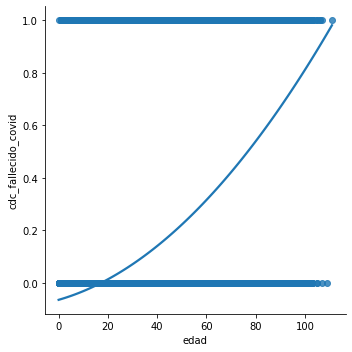

In [ ]:
sns.lmplot(x ="edad", y ="cdc_fallecido_covid", data = df_binary, order = 2, ci = None)

In [ ]:
X = np.array(df_binary['edad']).reshape(-1, 1)
y = np.array(df_binary['cdc_fallecido_covid']).reshape(-1, 1)
df_binary.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.16433065298944205


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


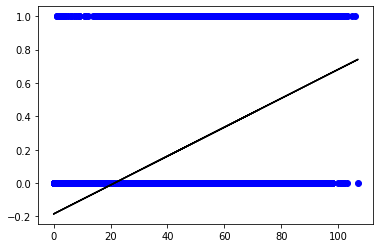

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

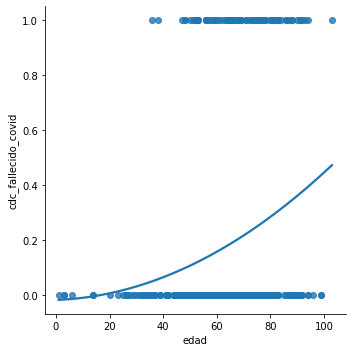

In [ ]:
df_binary500 = df_binary[:][:500]
sns.lmplot(x ="edad", y ="cdc_fallecido_covid", data = df_binary500,order = 2, ci = None)



## **REGRESION LOGISTICA**



In [ ]:
#Data
X = np.array(df_binary['edad']).reshape(-1, 1)
y = np.array(df_binary['cdc_fallecido_covid']).reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Creacion de una instancia de la RL
regresion_logistica = LogisticRegression()

# Entrenamiento
regresion_logistica.fit(X,y)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
X_nuevo = np.array([58,56,68,7,79,86,98,111]).reshape(-1,1)
# Obteniendo predicciones con los datos especificos
prediccion = regresion_logistica.predict(X_nuevo)
print(prediccion)

[0 0 0 0 1 1 1 1]


# REDES NEURONALES

In [ ]:
import pandas_datareader as pdr
from datetime import datetime
import tensorflow as tf
import matplotlib.pyplot as plt

capa = tf.keras.layers.Dense(units = 1, input_shape=[1])

modelo = tf.keras.Sequential([capa])
modelo.compile(
  optimizer=tf.keras.optimizers.Adamax(0.1),
  loss="mean_squared_error"
)

historico = modelo.fit(data2.edad, data2.cdc_fallecido_covid, epochs=100, verbose=False)

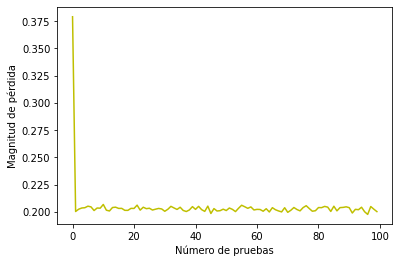

In [ ]:
plt.xlabel("Número de pruebas")
plt.ylabel("Magnitud de pérdida")
plt.plot(historico.history["loss"], c='y')
plt.show()

In [ ]:
#ingresar edad
edad=86
resp= modelo.predict([valor])
print("VALOR SIN REDONDEO:   ----> ",resp)
x = np.round(modelo.predict([valor]))
print(x)

if x < 1:
  print("El paciente de ",edad," posee mayor probabilidad de vivir")
else:
  print("El paciente de ",edad," posee mayor probabilidad de morir")

1/1 [==============================] - 0s 67ms/step
VALOR SIN REDONDEO:   ---->  [[0.77992916]]
1/1 [==============================] - 0s 33ms/step
[[1.]]
El paciente de  86  posee mayor probabilidad de morir
